In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import importlib
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split
import warnings

In [18]:
warnings.filterwarnings('ignore')

In [2]:
sys.path.append('../scripts')

In [3]:
import feature_engineering
import feature_preprocessing

In [4]:
importlib.reload(feature_engineering)

<module 'feature_engineering' from 'C:\\Users\\Jorge\\Desktop\\Data_Science\\Projects\\Depression_repo\\notebooks\\../scripts\\feature_engineering.py'>

In [5]:
importlib.reload(feature_preprocessing)

<module 'feature_preprocessing' from 'C:\\Users\\Jorge\\Desktop\\Data_Science\\Projects\\Depression_repo\\notebooks\\../scripts\\feature_preprocessing.py'>

In [6]:
from feature_engineering import create_features
from preprocessing import plot_histograms, load_list_from_pkl, save_list_to_pkl, update_metadata_file
from feature_preprocessing import preprocess_dataframe 

In [7]:
# Set pyplot and seaborn defaults

sns.set()
sns.set_context('notebook',font_scale = 1.5)
sns.set_style('ticks')
sns.set_palette("Paired")

plt.rc("axes.spines", top=False, right=False)
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plt.rcParams["figure.figsize"] = (15,8)

In [8]:
metadata_file = '../data/processed/metadata.csv'
df_path = '../data/processed/'

In [14]:
metadata_df = pd.read_csv(metadata_file)
display(HTML(metadata_df.to_html()))

,DataFrame,Shape,Comments
0,df_input,"(33320, 127)",Complete cleaned input data
1,df_study,"(9227, 87)",Cleaned + filtered input data based on paper's specifications + deleted features mssing >10% data


In [9]:
df_study = pd.read_pickle(r'../data/processed/df_study')

In [10]:
target_list=["phq9_cat_end","phq9_cat_start","phq9_score_end","phq9_score_start"]

In [17]:
data = df_study.drop(columns=target_list)
target_cat = df_study["phq9_cat_end"]

In [11]:
#data.to_pickle(df_path+'data')
#target_cat.to_pickle(df_path+'target_cat')
data = pd.read_pickle(r'../data/processed/data')
target_cat = pd.read_pickle(r'../data/processed/target_cat')

In [18]:
metadata_df = update_metadata_file('data', data.shape, 'df_study without target variables', metadata_file)
metadata_df = update_metadata_file('target_cat', target_cat.shape, 'target phq9_cat_end from df_study', metadata_file)
display(HTML(metadata_df.to_html()))

C:\Users\Jorge\Desktop\Data_Science\Projects\Depression_repo\notebooks\../scripts\preprocessing.py:195: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_df = metadata_df.append(new_row, ignore_index=True)
C:\Users\Jorge\Desktop\Data_Science\Projects\Depression_repo\notebooks\../scripts\preprocessing.py:195: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_df = metadata_df.append(new_row, ignore_index=True)


,DataFrame,Shape,Comments
0,df_input,"(33320, 127)",Complete cleaned input data
1,df_study,"(9227, 87)",Cleaned + filtered input data based on paper's specifications + deleted features mssing >10% data
2,data,"(9227, 83)",df_study without target variables
3,target_cat,"(9227,)",target phq9_cat_end from df_study


## Train, test and validation split

In [19]:
data_train, data_test, target_train, target_test = train_test_split(
    data, target_cat, test_size=0.1, random_state=1
)

In [12]:
# data_train.to_pickle(df_path+'data_train')
# data_test.to_pickle(df_path+'data_test')
# target_train.to_pickle(df_path+'target_train')
# target_test.to_pickle(df_path+'target_test')
data_train = pd.read_pickle(r'../data/processed/data_train')
data_test = pd.read_pickle(r'../data/processed/data_test')
target_train = pd.read_pickle(r'../data/processed/target_train')
target_test = pd.read_pickle(r'../data/processed/target_test')

In [20]:
metadata_df = update_metadata_file('data_train', data_train.shape, '90% of df data for model training', metadata_file)
metadata_df = update_metadata_file('data_test', data_test.shape, '10% of df data for model testing', metadata_file)
metadata_df = update_metadata_file('target_train', target_train.shape, '90% of df target_cat for model training', metadata_file)
metadata_df = update_metadata_file('target_test', target_test.shape, '10% of df target_cat for model testing', metadata_file)
display(HTML(metadata_df.to_html()))

C:\Users\Jorge\Desktop\Data_Science\Projects\Depression_repo\notebooks\../scripts\preprocessing.py:195: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_df = metadata_df.append(new_row, ignore_index=True)
C:\Users\Jorge\Desktop\Data_Science\Projects\Depression_repo\notebooks\../scripts\preprocessing.py:195: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_df = metadata_df.append(new_row, ignore_index=True)
C:\Users\Jorge\Desktop\Data_Science\Projects\Depression_repo\notebooks\../scripts\preprocessing.py:195: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_df = metadata_df.append(new_row, ignore_index=True)
C:\Users\Jorge\Desktop\Data_Science\Projects\Depression_repo\notebooks\../scripts\preprocessing.py:1

,DataFrame,Shape,Comments
0,df_input,"(33320, 127)",Complete cleaned input data
1,df_study,"(9227, 87)",Cleaned + filtered input data based on paper's specifications + deleted features mssing >10% data
2,data,"(9227, 83)",df_study without target variables
3,target_cat,"(9227,)",target phq9_cat_end from df_study
4,data_train,"(8304, 83)",90% of df data for model training
5,data_test,"(923, 83)",10% of df data for model testing
6,target_train,"(8304,)",90% of df target_cat for model training
7,target_test,"(923,)",10% of df target_cat for model testing


In [21]:
X_train_full = feature_engineering.create_features(data_train)

In [32]:
#X_train_full.to_pickle(df_path+'X_train_full')
X_train_full = pd.read_pickle(r'../data/processed/X_train_full')

In [13]:
X_test_full = feature_engineering.create_features(data_test)

In [14]:
metadata_df = update_metadata_file('X_test_full', X_test_full.shape, 'data_test df with all additional feature engineering columns (+50)', metadata_file)
display(HTML(metadata_df.to_html()))

C:\Users\Jorge\Desktop\Data_Science\Projects\Depression_repo\notebooks\../scripts\preprocessing.py:195: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metadata_df = metadata_df.append(new_row, ignore_index=True)


,DataFrame,Shape,Comments
0,df_input,"(33320, 127)",Complete cleaned input data
1,df_study,"(9227, 87)",Cleaned + filtered input data based on paper's specifications + deleted features missing >10% data
2,data,"(9227, 83)",df_study without target variables
3,target_cat,"(9227,)",target phq9_cat_end from df_study
4,data_train,"(8304, 83)",90% of df data for model training
5,data_test,"(923, 83)",10% of df data for model testing
6,target_train,"(8304,)",90% of df target_cat for model training
7,target_test,"(923,)",10% of df target_cat for model testing
8,X_train_full,"(8304, 143)",data_train df with all additional feature engineering columns (+50)
9,X_train_full_preprocessed,"(8304, 145)","X_train_full df with preprocessing (imputation, scaling...)"


In [65]:
metadata_df = update_metadata_file('X_train_full', X_train_full.shape, 'data_train df with all additional feature engineering columns (+50)', metadata_file)
display(HTML(metadata_df.to_html()))

C:\Users\Jorge\anaconda3\envs\xgboost_env\lib\site-packages\pandas\core\internals\blocks.py:940: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.asarray(value)


,DataFrame,Shape,Comments
0,df_input,"(33320, 127)",Complete cleaned input data
1,df_study,"(9227, 87)",Cleaned + filtered input data based on paper's specifications + deleted features mssing >10% data
2,data,"(9227, 83)",df_study without target variables
3,target_cat,"(9227,)",target phq9_cat_end from df_study
4,data_train,"(8304, 83)",90% of df data for model training
5,data_test,"(923, 83)",10% of df data for model testing
6,target_train,"(8304,)",90% of df target_cat for model training
7,target_test,"(923,)",10% of df target_cat for model testing
8,X_train_full,"(8304, 143)",data_train df with all additional feature engineering columns (+50)


In [15]:
X_test_full.to_pickle(df_path+'X_test_full')

In [69]:
data_add_features = feature_engineering.create_features(data)

In [23]:
#data_add_features.to_pickle(df_path+'data_add_features')
data_add_features = pd.read_pickle(r'../data/processed/data_add_features')

In [71]:
metadata_df = update_metadata_file('data_add_features', data_add_features.shape, 'data df with additional features (+50)', metadata_file)
display(HTML(metadata_df.to_html()))

C:\Users\Jorge\anaconda3\envs\xgboost_env\lib\site-packages\pandas\core\internals\blocks.py:940: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.asarray(value)


,DataFrame,Shape,Comments
0,df_input,"(33320, 127)",Complete cleaned input data
1,df_study,"(9227, 87)",Cleaned + filtered input data based on paper's specifications + deleted features mssing >10% data
2,data,"(9227, 83)",df_study without target variables
3,target_cat,"(9227,)",target phq9_cat_end from df_study
4,data_train,"(8304, 83)",90% of df data for model training
5,data_test,"(923, 83)",10% of df data for model testing
6,target_train,"(8304,)",90% of df target_cat for model training
7,target_test,"(923,)",10% of df target_cat for model testing
8,X_train_full,"(8304, 143)",data_train df with all additional feature engineering columns (+50)
9,X_train_full_preprocessed,"(8304, 145)","X_train_full df with preprocessing (imputation, scaling...)"


In [28]:
data_add_features_preprocessed = preprocess_dataframe(data_add_features)

In [29]:
data_add_features_preprocessed.to_pickle(df_path+'data_add_features_preprocessed')

In [30]:
metadata_df = update_metadata_file('data_add_features_preprocessed', data_add_features_preprocessed.shape, 'data_add_features df with preprocessing', metadata_file)

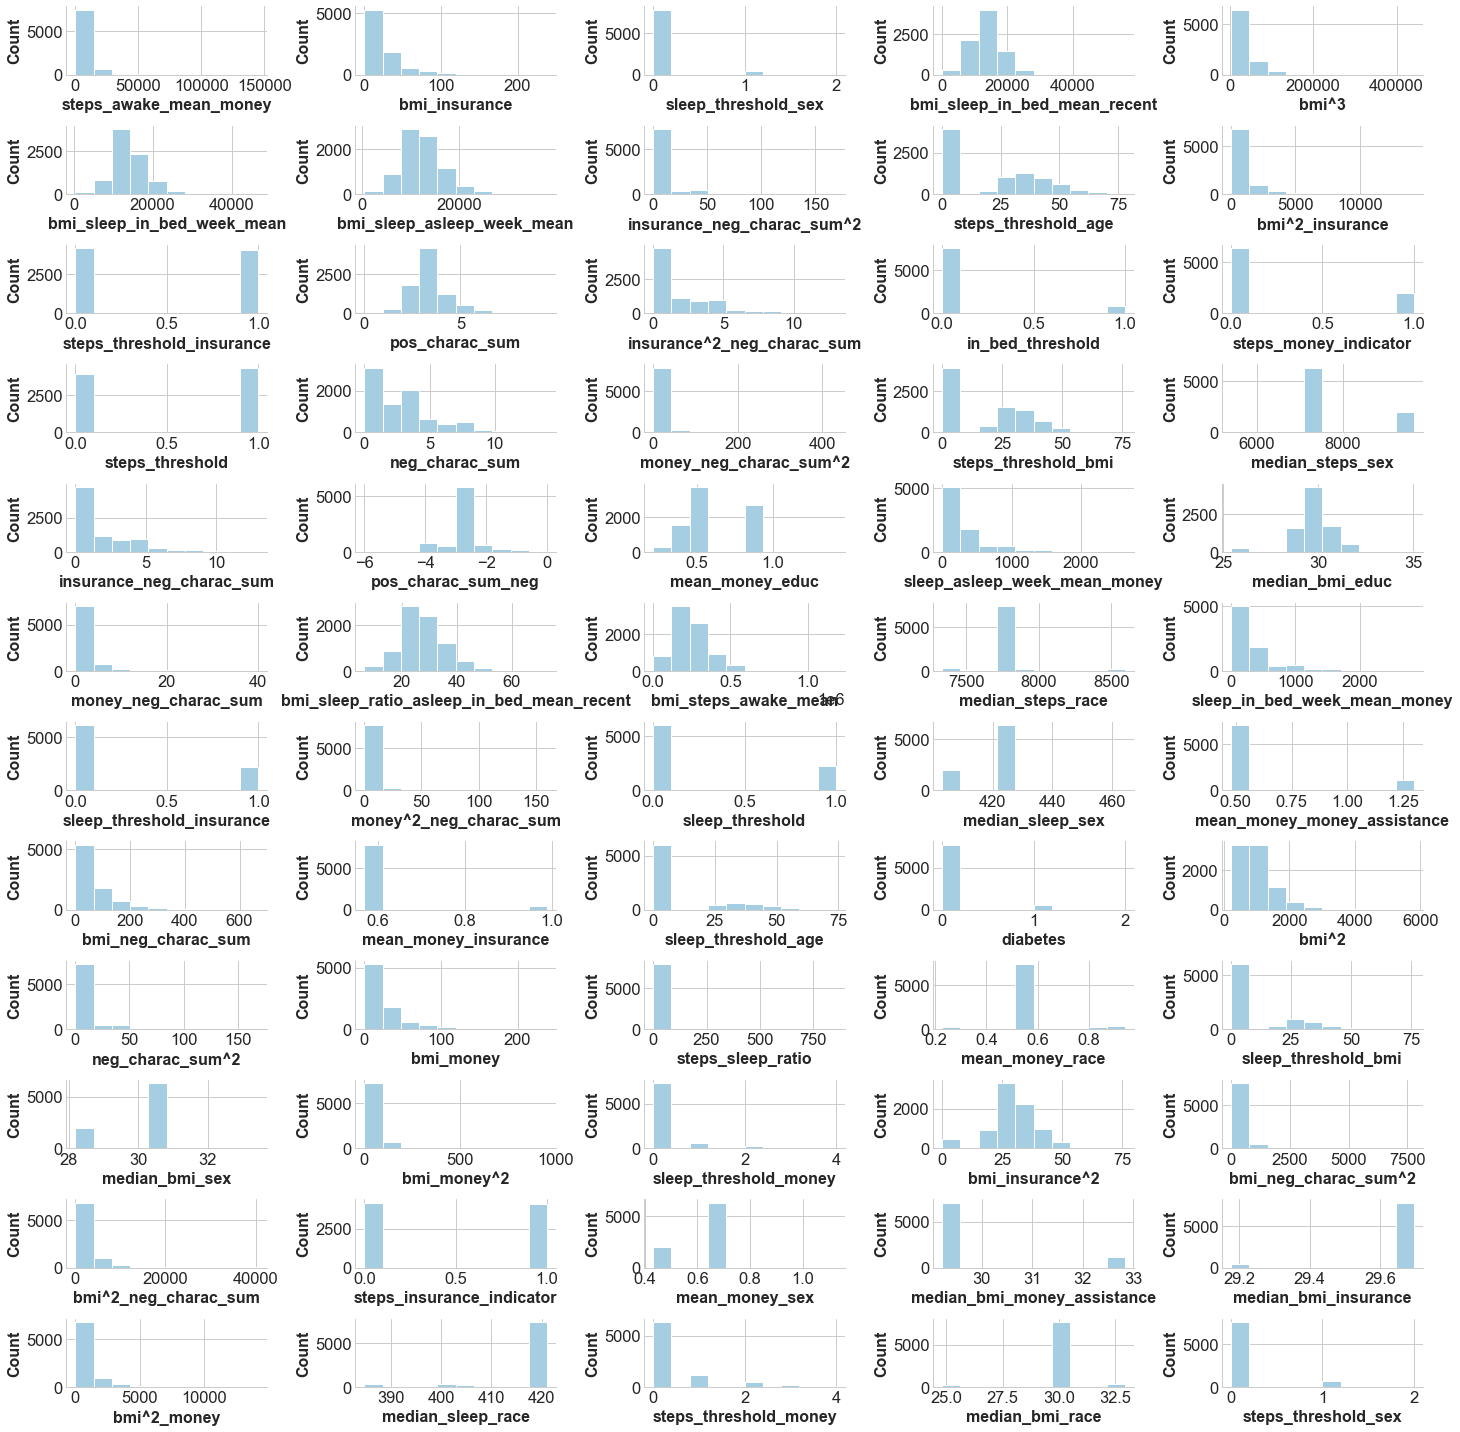

In [23]:
plot_histograms(X_train_full, set(X_train_full.columns)-set(df_study.columns), (20, 20))

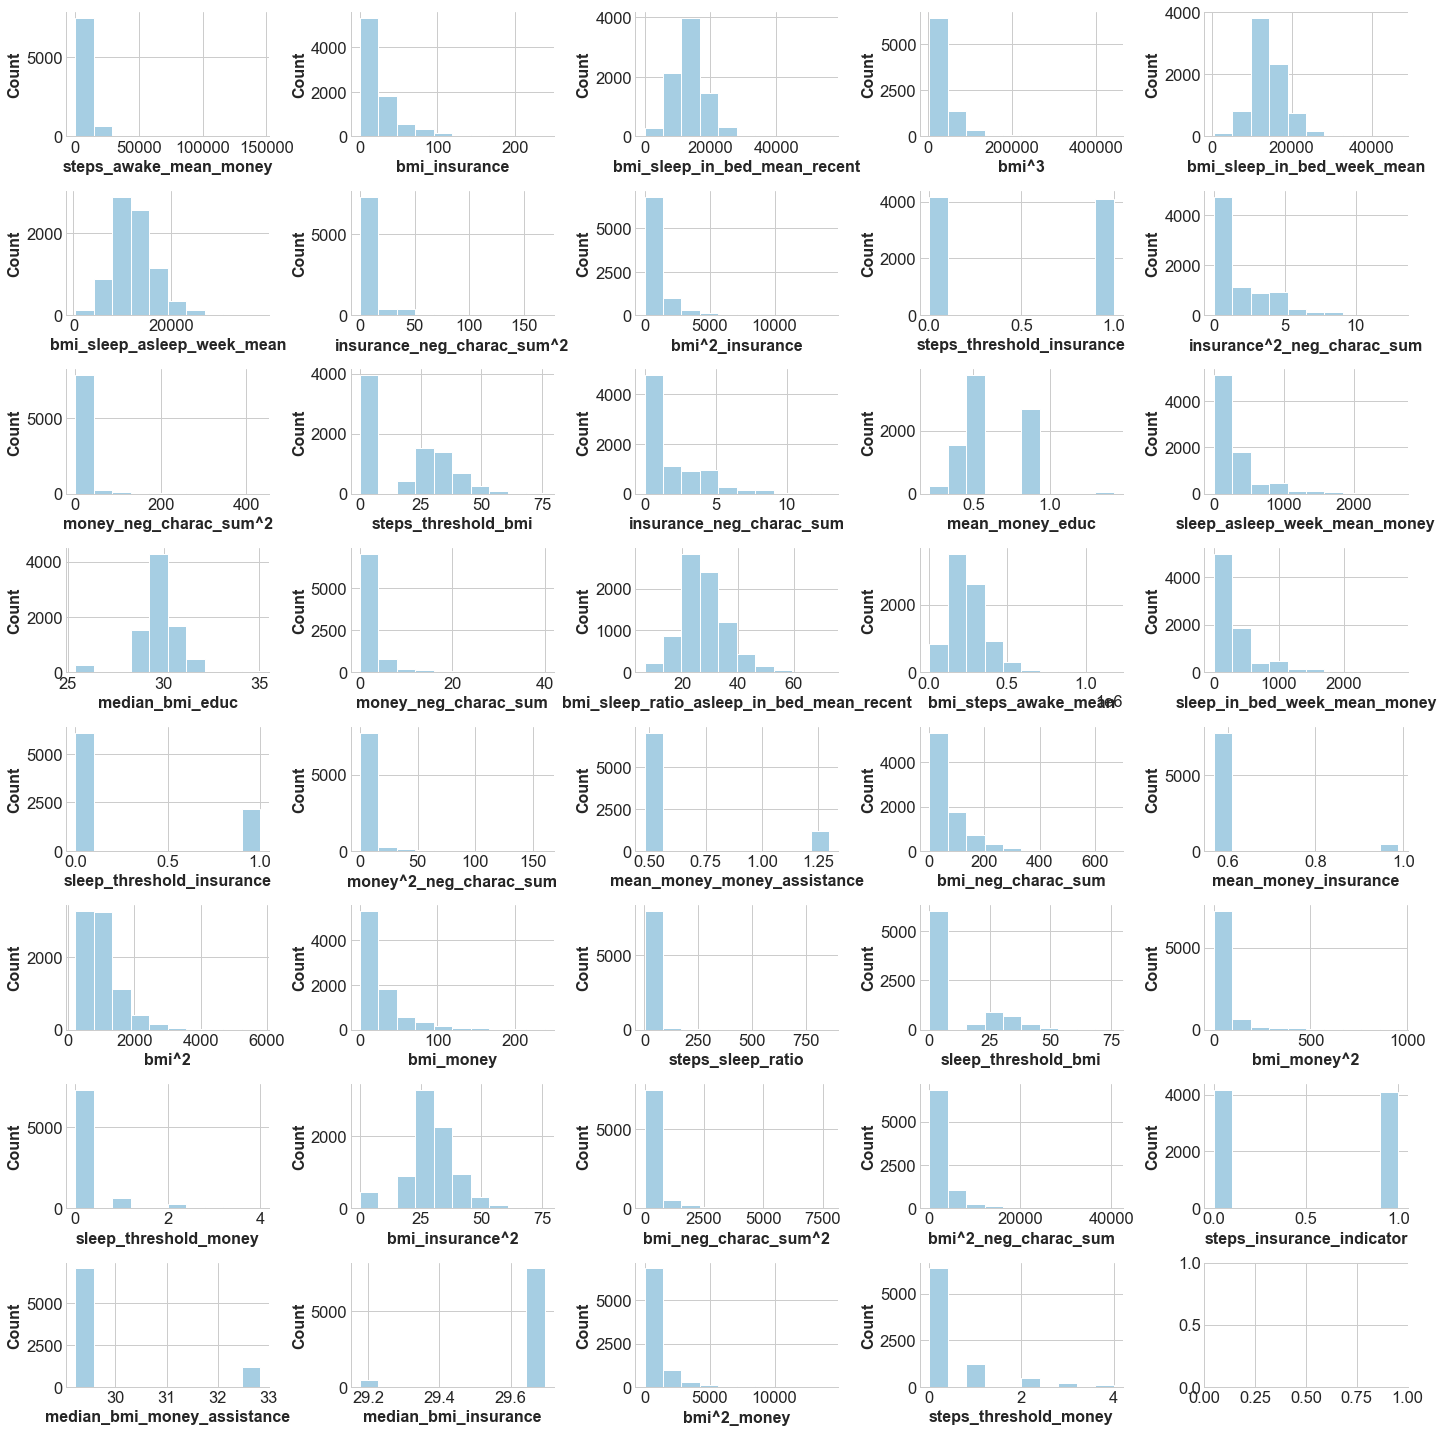

In [89]:
plot_histograms(X_train_full, set(missing_val_count_by_column)-set(df_study.columns), (20, 20))

In [88]:
missing_val_count_by_column = create_features(data).isna().sum()
missing_val_count_by_column = missing_val_count_by_column[missing_val_count_by_column > 0].index.tolist()
set(missing_val_count_by_column)-set(df_study.columns)

{'bmi^2',
 'bmi^2_insurance',
 'bmi^2_money',
 'bmi^2_neg_charac_sum',
 'bmi^3',
 'bmi_insurance',
 'bmi_insurance^2',
 'bmi_money',
 'bmi_money^2',
 'bmi_neg_charac_sum',
 'bmi_neg_charac_sum^2',
 'bmi_sleep_asleep_week_mean',
 'bmi_sleep_in_bed_mean_recent',
 'bmi_sleep_in_bed_week_mean',
 'bmi_sleep_ratio_asleep_in_bed_mean_recent',
 'bmi_steps_awake_mean',
 'insurance^2_neg_charac_sum',
 'insurance_neg_charac_sum',
 'insurance_neg_charac_sum^2',
 'mean_money_educ',
 'mean_money_insurance',
 'mean_money_money_assistance',
 'median_bmi_educ',
 'median_bmi_insurance',
 'median_bmi_money_assistance',
 'money^2_neg_charac_sum',
 'money_neg_charac_sum',
 'money_neg_charac_sum^2',
 'sleep_asleep_week_mean_money',
 'sleep_in_bed_week_mean_money',
 'sleep_threshold_bmi',
 'sleep_threshold_insurance',
 'sleep_threshold_money',
 'steps_awake_mean_money',
 'steps_insurance_indicator',
 'steps_sleep_ratio',
 'steps_threshold_bmi',
 'steps_threshold_insurance',
 'steps_threshold_money'}

In [24]:
list_path = '../data/lists/'
impute_most_frequent = load_list_from_pkl(list_path+'impute_most_frequent.pkl')
impute_median = load_list_from_pkl(list_path+'impute_median.pkl')
scale = load_list_from_pkl(list_path+'scale.pkl')
yeo = load_list_from_pkl(list_path+'yeo.pkl')
to_bin = load_list_from_pkl(list_path+'to_bin.pkl')
to_encode = load_list_from_pkl(list_path+'to_encode.pkl')
cols_to_impute = load_list_from_pkl(list_path+'cols_to_impute.pkl')

In [26]:
to_bin.extend(['bmi^2','median_steps_race','bmi^3','median_bmi_race','median_sleep_sex','median_steps_sex','bmi_neg_charac_sum','money_neg_charac_sum','steps_awake_mean_money',
              'bmi_neg_charac_sum^2','insurance^2_neg_charac_sum','insurance_neg_charac_sum^2','bmi_money','bmi^2_insurance','money^2_neg_charac_sum',
              'money_neg_charac_sum^2','insurance_neg_charac_sum','mean_money_race','median_bmi_educ','bmi^2_neg_charac_sum', 'steps_sleep_ratio','bmi_insurance^2',
              'median_sleep_race'])
scale.extend(['bmi^2_money','neg_charac_sum^2','pos_charac_sum','pos_charac_sum_neg','neg_charac_sum','median_bmi_sex','median_bmi_insurance','bmi_sleep_in_bed_mean_recent',
              'bmi_sleep_ratio_asleep_in_bed_mean_recent','bmi_sleep_asleep_week_mean','bmi_steps_awake_mean','sleep_asleep_week_mean_money','median_bmi_money_assistance',
             'bmi_money^2','bmi_sleep_in_bed_week_mean','bmi_insurance','sleep_in_bed_week_mean_money',
             "sleep_threshold_bmi","sleep_threshold_sex","sleep_threshold_age","sleep_threshold_insurance","steps_threshold_money","steps_threshold_bmi","steps_threshold_sex",
              "steps_threshold_age","steps_threshold_insurance"])
yeo.extend(['bmi^2_money','neg_charac_sum^2','pos_charac_sum','pos_charac_sum_neg','neg_charac_sum','bmi_sleep_ratio_asleep_in_bed_mean_recent',
            'bmi_sleep_asleep_week_mean','bmi_steps_awake_mean','sleep_asleep_week_mean_money','bmi_money^2','bmi_sleep_in_bed_week_mean','bmi_insurance','sleep_in_bed_week_mean_money'])
impute_most_frequent.extend(['bmi^2','bmi^2_insurance', 'bmi^2_money','bmi^2_neg_charac_sum', 'bmi^3', 'bmi_insurance', 'bmi_money', 'bmi_money^2', 'bmi_neg_charac_sum', 
                             'bmi_neg_charac_sum^2','insurance^2_neg_charac_sum', 'insurance_neg_charac_sum', 'insurance_neg_charac_sum^2', 'mean_money_educ', 'mean_money_insurance',
                             'mean_money_money_assistance','median_bmi_insurance','median_bmi_money_assistance', 'money^2_neg_charac_sum', 'money_neg_charac_sum',
                             'money_neg_charac_sum^2', 'sleep_asleep_week_mean_money', 'sleep_in_bed_week_mean_money', 'sleep_threshold_bmi', 'sleep_threshold_insurance',
                             'sleep_threshold_money', 'steps_awake_mean_money', 'steps_insurance_indicator', 'steps_sleep_ratio', 'steps_threshold_bmi', 'steps_threshold_insurance',
                             'steps_threshold_money'])
impute_median.extend(['bmi_sleep_asleep_week_mean','bmi_sleep_in_bed_mean_recent','bmi_sleep_in_bed_week_mean','median_bmi_educ','bmi_sleep_ratio_asleep_in_bed_mean_recent',
                     'bmi_steps_awake_mean','bmi_insurance^2'])

In [105]:
impute_most_frequent

['sleep__main_efficiency__intercept',
 'insurance',
 'sleep__awake_regions__countDistinct__coeff',
 'sleep_ratio_asleep_in_bed_weekday_mean',
 'sleep_main_start_hour_adj_range',
 'sleep__total_in_bed_minutes__intercept',
 'steps__light_activity__sum__coeff',
 'sleep__main_start_hour_adj__intercept',
 'steps__awake__sum__intercept',
 'money',
 'birth',
 'sleep__main_start_hour_adj__coeff',
 'sleep__nap_count__intercept',
 'sleep__awake__sum__coeff',
 'sleep_ratio_asleep_in_bed_weekend_mean',
 'sleep__total_asleep_minutes__coeff',
 'sleep_ratio_asleep_in_bed__coeff',
 'sleep_ratio_asleep_in_bed__intercept',
 'pregnant',
 'sleep__total_in_bed_minutes__coeff',
 'sleep__main_efficiency__coeff',
 'steps__rolling_6_sum__max__intercept',
 'steps__light_activity__sum__intercept',
 'money_assistance',
 'sleep__nap_count__coeff',
 'sleep__awake__sum__intercept',
 'sleep__total_asleep_minutes__intercept',
 'steps__awake__sum__coeff',
 'sleep_ratio_asleep_in_bed_mean_recent',
 'steps__rolling_6_sum

In [94]:
impute_median

['steps_awake_mean',
 'sleep_main_start_hour_adj_median',
 'sleep_asleep_mean_recent',
 'sleep_in_bed_mean_recent',
 'steps_rolling_6_max_recent',
 'educ',
 'height',
 'bmi',
 'sleep_asleep_week_mean',
 'sleep_in_bed_week_mean',
 'steps_rolling_6_median_recent',
 'bmi_sleep_asleep_week_mean',
 'bmi_sleep_in_bed_mean_recent',
 'bmi_sleep_in_bed_week_mean',
 'median_bmi_educ',
 'bmi_sleep_ratio_asleep_in_bed_mean_recent',
 'bmi_steps_awake_mean',
 'bmi_insurance^2']

In [92]:
cols_to_impute

['steps_awake_mean',
 'sleep_ratio_asleep_in_bed_weekday_mean',
 'sleep_ratio_asleep_in_bed_weekend_mean',
 'sleep_main_start_hour_adj_median',
 'sleep_main_start_hour_adj_range',
 'sleep__main_start_hour_adj__intercept',
 'sleep__main_start_hour_adj__coeff',
 'steps__awake__sum__intercept',
 'steps__awake__sum__coeff',
 'steps__light_activity__sum__intercept',
 'steps__light_activity__sum__coeff',
 'steps__rolling_6_sum__max__intercept',
 'steps__rolling_6_sum__max__coeff',
 'sleep__nap_count__intercept',
 'sleep__nap_count__coeff',
 'sleep__total_asleep_minutes__intercept',
 'sleep__total_asleep_minutes__coeff',
 'sleep__main_efficiency__intercept',
 'sleep__main_efficiency__coeff',
 'sleep__awake__sum__intercept',
 'sleep__awake__sum__coeff',
 'sleep__total_in_bed_minutes__intercept',
 'sleep__total_in_bed_minutes__coeff',
 'sleep__awake_regions__countDistinct__intercept',
 'sleep__awake_regions__countDistinct__coeff',
 'sleep_ratio_asleep_in_bed__intercept',
 'sleep_ratio_asleep_in

In [27]:
save_list_to_pkl(scale, list_path,'scale')
save_list_to_pkl(yeo, list_path,'yeo')
save_list_to_pkl(to_bin, list_path,'to_bin')
save_list_to_pkl(impute_most_frequent, list_path,'impute_most_frequent')
save_list_to_pkl(impute_median, list_path,'impute_median')

In [116]:
# Define the new lists
impute_most_f_scale_cols = []
impute_median_scale_cols = []
impute_most_f_yeo_cols = []
impute_median_yeo_cols = []
impute_median_scale_yeo_cols = []
impute_most_f_scale_yeo_cols = []
impute_most_f_only = []
impute_median_only = []
scale_yeo_cols = []
scale_cols_only = []
encode_cols_only = []
# Iterate through all columns
for col in X_train_full.columns:
    if col in impute_most_frequent and col in scale and col not in yeo and col not in to_bin and col not in to_encode:
        impute_most_f_scale_cols.append(col)
    if col in impute_median and col in scale and col not in yeo and col not in to_bin and col not in to_encode:
        impute_median_scale_cols.append(col)
    if col in impute_most_frequent and col in yeo and col not in scale and col not in to_bin and col not in to_encode:
        impute_most_f_yeo_cols.append(col)
    if col in impute_median and col in yeo and col not in scale and col not in to_bin and col not in to_encode:
        impute_median_yeo_cols.append(col)
    if col in impute_most_frequent and col in scale and col in yeo and col not in to_bin and col not in to_encode:
        impute_most_f_scale_yeo_cols.append(col)
    if col in impute_median and col in scale and col in yeo and col not in to_bin and col not in to_encode:
        impute_median_scale_yeo_cols.append(col) 
    if col in impute_most_frequent and col not in impute_median and col not in scale and col not in yeo and col not in to_bin and col not in to_encode:
        impute_most_f_only.append(col)
    if col in impute_median and col not in impute_most_frequent and col not in scale and col not in yeo and col not in to_bin and col not in to_encode:
        impute_median_only.append(col)
    if col in scale and col in yeo and col not in impute_most_frequent and col not in impute_median and col not in to_bin and col not in to_encode:
        scale_yeo_cols.append(col)
    if col in scale and col not in impute_most_frequent and col not in impute_median and col not in yeo and col not in to_bin and col not in to_encode:
        scale_cols_only.append(col)
    if col in to_encode and col not in impute_most_frequent and col not in impute_median and col not in yeo and col not in to_bin and col not in scale:
        encode_cols_only.append(col)

In [118]:
save_list_to_pkl(impute_most_f_scale_cols, list_path,'impute_most_f_scale_cols')
save_list_to_pkl(impute_median_scale_cols, list_path,'impute_median_scale_cols')
save_list_to_pkl(impute_most_f_yeo_cols, list_path,'impute_most_f_yeo_cols')
save_list_to_pkl(impute_median_yeo_cols, list_path,'impute_median_yeo_cols')
save_list_to_pkl(impute_most_f_scale_yeo_cols, list_path,'impute_most_f_scale_yeo_cols')
save_list_to_pkl(impute_median_scale_yeo_cols, list_path,'impute_median_scale_yeo_cols')
save_list_to_pkl(impute_most_f_only, list_path,'impute_most_f_only')
save_list_to_pkl(impute_median_only, list_path,'impute_median_only')
save_list_to_pkl(scale_yeo_cols, list_path,'scale_yeo_cols')
save_list_to_pkl(scale_cols_only, list_path,'scale_cols_only')
save_list_to_pkl(encode_cols_only, list_path,'encode_cols_only')

In [33]:
X_train_full_preprocessed = preprocess_dataframe(X_train_full)

In [34]:
metadata_df = update_metadata_file('X_train_full_preprocessed', X_train_full_preprocessed.shape, 'X_train_full df with preprocessing (imputation, scaling...)', metadata_file)
display(HTML(metadata_df.to_html()))

,DataFrame,Shape,Comments
0,df_input,"(33320, 127)",Complete cleaned input data
1,df_study,"(9227, 87)",Cleaned + filtered input data based on paper's specifications + deleted features missing >10% data
2,data,"(9227, 83)",df_study without target variables
3,target_cat,"(9227,)",target phq9_cat_end from df_study
4,data_train,"(8304, 83)",90% of df data for model training
5,data_test,"(923, 83)",10% of df data for model testing
6,target_train,"(8304,)",90% of df target_cat for model training
7,target_test,"(923,)",10% of df target_cat for model testing
8,X_train_full,"(8304, 143)",data_train df with all additional feature engineering columns (+50)
9,X_train_full_preprocessed,"(8304, 145)","X_train_full df with preprocessing (imputation, scaling...)"


In [35]:
X_train_full_preprocessed.to_pickle(df_path+'X_train_full_preprocessed')

In [36]:
X_test_full_preprocessed = preprocess_dataframe(X_test_full)

In [20]:
metadata_df = update_metadata_file('X_test_full_preprocessed', X_test_full_preprocessed.shape, 'X_test_full df with preprocessing (imputation, scaling...)', metadata_file)
display(HTML(metadata_df.to_html()))

,DataFrame,Shape,Comments
0,df_input,"(33320, 127)",Complete cleaned input data
1,df_study,"(9227, 87)",Cleaned + filtered input data based on paper's specifications + deleted features missing >10% data
2,data,"(9227, 83)",df_study without target variables
3,target_cat,"(9227,)",target phq9_cat_end from df_study
4,data_train,"(8304, 83)",90% of df data for model training
5,data_test,"(923, 83)",10% of df data for model testing
6,target_train,"(8304,)",90% of df target_cat for model training
7,target_test,"(923,)",10% of df target_cat for model testing
8,X_train_full,"(8304, 143)",data_train df with all additional feature engineering columns (+50)
9,X_train_full_preprocessed,"(8304, 145)","X_train_full df with preprocessing (imputation, scaling...)"


In [37]:
X_test_full_preprocessed.to_pickle(df_path+'X_test_full_preprocessed')